In [39]:
# Ignore the code in this cell!!

import svgwrite
import collections

nobinding = "nobinding"

def binding(var):
    try:
        return eval(var)
    except NameError:
        return nobinding
    
class listis:
    def __init__(self):
        self.lis = []
    def get(self, key):
        for k,v in self.lis:
            if key is k:
                return v
    def put(self, key, val):
        new = True
        for pair in self.lis:
            if pair[0] is key:
                pair[1].append(val)
                new = False
        if new:
            self.lis.append([key, [val]])
    def keys(self):
        return [k for k,v in self.lis]

class memgraph:
    def __init__(self, vars):
        self.vars = sorted(vars)
        
    def _repr_svg_(self):
        d = svgwrite.Drawing(size=(800,150))

        left = 100
        right = 260
        dy = 30
        vv = listis()
        ais = listis()
        
        for var in self.vars:
            val = binding(var)
            if val != nobinding:
                vv.put(val,var)
                ais.put(val, val)

        vals = ais.keys()
        vary = dict()
        
        y = dy
        d.add(d.text("Variables", insert=(left, y), text_anchor="end", fill='blue'))
        y += dy
        
        for var in self.vars:
            d.add(d.text(var, insert=(left, y), text_anchor="end", fill='black'))
            vary[var] = y
            y += dy

        y = dy
        d.add(d.text("Objects(in the Heap)", insert=(right, y), fill='blue'))
        y += dy
        
        for val in vals:
            d.add(d.text(str(val), insert=(right, y), fill='black'))

            for var in vv.get(val):
                ly = vary[var]
                d.add(d.line((left, ly ), (right, y),  stroke=svgwrite.rgb(90, 10, 16, '%')))
            y += dy
            
        return d.tostring()

    def svg(self):
        return self._repr_svg_()



# Dictionary
+ links objects in key/value pairs
- key order is undefined
+ also known as a map, association, or hash table
+ built into the language - another python workhorse
- type name is 'dict'

In [1]:
#  two ways to make a empty dictionary 

[{}, dict(), type({})]

[{}, {}, dict]

In [2]:
# dictionaries are written with curly '{}' brackets, and
# key:value elements

d = {'school':'columbia', 'class':'python', 'size':44}

In [3]:
# len returns number of key/value pairs

len(d)

3

In [ ]:
d['school']

In [4]:
# add a key/value

d['dept'] = 'comp sci'
d

{'class': 'python', 'dept': 'comp sci', 'school': 'columbia', 'size': 44}

In [5]:
# if you ask for a key that doesn't exist, 
# you'll get an error

d['state']

KeyError: 'state'

In [6]:
# you can check for a key w/o an error
# by using 'in'

['dept' in d, 'state' in d]

[True, False]

In [7]:
# keys come back in an unpredictable order

d.keys()

dict_keys(['dept', 'size', 'school', 'class'])

In [8]:
# list of values

d.values()

dict_values(['comp sci', 44, 'columbia', 'python'])

In [9]:
# list of (k,v) tuples

iview = d.items()
iview

dict_items([('dept', 'comp sci'), ('size', 44), ('school', 'columbia'), ('class', 'python')])

## Dictionary Views
- similiar to database view concept
- keys, values, items methods return 'live views', not 'dead lists'
- views always reflect the current contents of the dict

In [10]:
ilist = list(d.items())
ilist

[('dept', 'comp sci'),
 ('size', 44),
 ('school', 'columbia'),
 ('class', 'python')]

In [11]:
# iv, the 'live' items view, has the new item

d['new'] = 'thing'
iview

dict_items([('dept', 'comp sci'), ('new', 'thing'), ('size', 44), ('school', 'columbia'), ('class', 'python')])

In [12]:
# the 'dead' list, does not

ilist

[('dept', 'comp sci'),
 ('size', 44),
 ('school', 'columbia'),
 ('class', 'python')]

In [13]:
# any object can be a value, but only immutable 
# objects can serve as keys
# so, a list can't be a key

d = dict()
d[[1,2,3]] = "val"

TypeError: unhashable type: 'list'

In [14]:
# but a tuple can be a key

d = dict()
d[(1,2,3)] = "val"

In [15]:
# can make a dictionary with a 
# dictionary comprehension

d = {x:x+10 for x in range(5)}
d

{0: 10, 1: 11, 2: 12, 3: 13, 4: 14}

In [16]:
# can use a comprehension to make a subset of a dictionary

{k:d[k] for k in d if k <3}

{0: 10, 1: 11, 2: 12}

In [ ]:
dir(dict)

# Sets
- element order is undefined
- duplicates not allowed
- written with items inside '{}' 
    - unlike dictionaries, no ':'
- type name is 'set'

In [17]:
# 'set' expanded range
# 'len' returns the number of elements in the set

s1 = set(range(4,10))
s2 = set(range(8, 12))
[s1,s2, type(s1), len(s1)]

[{4, 5, 6, 7, 8, 9}, {8, 9, 10, 11}, set, 6]

In [18]:
# note that the set constructor takes an "iterable" 
# something that produces a sequence of values
# 34 is NOT an iterable so this bombs

set(34)

TypeError: 'int' object is not iterable

In [19]:
# to make a set with one element, do

s = set()
s.add(34)
s

{34}

In [20]:
# order doesn't matter

{4,5,2} == {2,4,5}

True

In [21]:
# duplicates are not allowed in a set

{2,2,3,4,5,5,6}

{2, 3, 4, 5, 6}

In [22]:
# intersection

s1 & s2

{8, 9}

In [23]:
# union - eliminates duplicates

s1 | s2

{4, 5, 6, 7, 8, 9, 10, 11}

In [24]:
# membership

[7 in s1, 12 in s2]

[True, False]

In [25]:
# set difference - elements in A but not in B

s1 - s2

{4, 5, 6, 7}

In [26]:
# elements in one set but not both

s1 ^ s2

{4, 5, 6, 7, 10, 11}

In [27]:
# add and remove set elements

s1.add(33)
s2.remove(9)
[s1, s2]

[{4, 5, 6, 7, 8, 9, 33}, {8, 10, 11}]

In [28]:
# can make a set with a 
# set comprehension

{j*j for j in range(-4,10)}

{0, 1, 4, 9, 16, 25, 36, 49, 64, 81}

# Example - anagrams
- words that use the same letters


In [29]:
# a string iterable produces the chars in the string

set('adsf')

{'a', 'd', 'f', 's'}

In [30]:
def anagram(s1, s2):
    set1 = set(s1)
    set2 = set(s2)
    return set1 == set2

In [31]:
# seems to work ok?

[anagram('cat', 'dog'), anagram('silent', 'listen')]

[False, True]

In [32]:
# well, not quite...

anagram('a', 'aa')

True

# Set methods

In [33]:
dir(set)

['__and__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__iand__',
 '__init__',
 '__ior__',
 '__isub__',
 '__iter__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__ne__',
 '__new__',
 '__or__',
 '__rand__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__ror__',
 '__rsub__',
 '__rxor__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__xor__',
 'add',
 'clear',
 'copy',
 'difference',
 'difference_update',
 'discard',
 'intersection',
 'intersection_update',
 'isdisjoint',
 'issubset',
 'issuperset',
 'pop',
 'remove',
 'symmetric_difference',
 'symmetric_difference_update',
 'union',
 'update']

# Some objects can be ordered
- can do N-compares

In [34]:
3<7

True

In [35]:
3<6<5

False

In [36]:
3 < 5 < 8 < 9 < 11 < 13

True

In [37]:
'AAA' < 'AAX'

True

# More about types

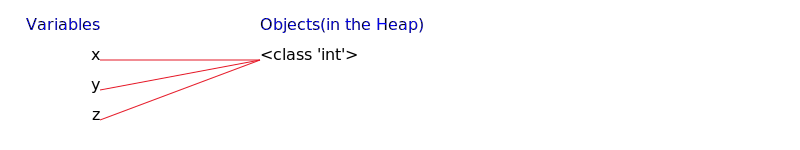

In [40]:
# types are singletons

x = type(234)
y = type(2)
z = int

memgraph(['x','y','z'])

In [41]:
# type names are also class constructor functions
# convert strings to ints and floats, and vv

[int('345'), float('3.34'), str(234), str(3.4)]

[345, 3.34, '234', '3.4']

In [42]:
# no arg usually produces a "default" value

[int(), float(), str()]

[0, 0.0, '']

In [43]:
# isinstance predicate
# a little nicer than 
# type(34) == int

[isinstance(34, int), isinstance(34, float)]

[True, False]

In [44]:
# can test for several types at once

[isinstance(34, (int, float)), 
 isinstance(234.234, (int,float)), 
 isinstance('asdf', (int,float))]

[True, True, False]

# Objects vs String Representation of an Object
- The 'string representation' is derived from an object, but should not be confused with the object itself.
- A given object can have multiple string Representations
    - two different strings might refer to the same object
        - 'larry' vs 'larry stead'
    - two identical strings might refer to different objects 
        - 'larry' and 'larry'. first 'larry' might refer to 'larry stead', the second to 'larry smith'
- also, some tools and versions of Python may print things slightly differently
    - ipython pretty printer - attempts to print complex objects in a form readable by humans
- we will see how this works in detail later

In [45]:
# example - int
# we see the same int object printed two different ways below

print(int)

<class 'int'>


In [46]:
# 'str' function converts object into a string representation

str(int)

"<class 'int'>"

In [47]:
# but here int prints differently
# why?

int

int

In [48]:
# it turns out ipython has a 'pretty printer' - which has its own notion
# of 'what looks nice'
# let's turn it OFF - then we get the same string as above
# some people think 'int' is prettier than '<class 'int'>

%pprint

int

Pretty printing has been turned OFF


<class 'int'>

In [49]:
# note however, that string reps are NOT always valid input

<class 'int'>

SyntaxError: invalid syntax (<ipython-input-49-85327f57862d>, line 3)

In [50]:
# another example 
# pretty printer is still off

list(range(50))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]

In [51]:
# turn it back on

%pprint

# now we get a one item per line print out, which could be helpful for 'wide' strings,
# but doesn't seem useful for small integers. (the pretty printer could be a 
# little smarter about this)

list(range(50))

Pretty printing has been turned ON


[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49]

In [52]:
# for these big ints, the pretty printer looks better...

[2**n for n in range(1000, 1004)]

[10715086071862673209484250490600018105614048117055336074437503883703510511249361224931983788156958581275946729175531468251871452856923140435984577574698574803934567774824230985421074605062371141877954182153046474983581941267398767559165543946077062914571196477686542167660429831652624386837205668069376,
 21430172143725346418968500981200036211228096234110672148875007767407021022498722449863967576313917162551893458351062936503742905713846280871969155149397149607869135549648461970842149210124742283755908364306092949967163882534797535118331087892154125829142392955373084335320859663305248773674411336138752,
 42860344287450692837937001962400072422456192468221344297750015534814042044997444899727935152627834325103786916702125873007485811427692561743938310298794299215738271099296923941684298420249484567511816728612185899934327765069595070236662175784308251658284785910746168670641719326610497547348822672277504,
 857206885749013856758740039248001448449123849364426885955000310696280840899948897994

In [53]:
# than this...

%pprint

[2**n for n in range(1000, 1004)]

Pretty printing has been turned OFF


[10715086071862673209484250490600018105614048117055336074437503883703510511249361224931983788156958581275946729175531468251871452856923140435984577574698574803934567774824230985421074605062371141877954182153046474983581941267398767559165543946077062914571196477686542167660429831652624386837205668069376, 21430172143725346418968500981200036211228096234110672148875007767407021022498722449863967576313917162551893458351062936503742905713846280871969155149397149607869135549648461970842149210124742283755908364306092949967163882534797535118331087892154125829142392955373084335320859663305248773674411336138752, 42860344287450692837937001962400072422456192468221344297750015534814042044997444899727935152627834325103786916702125873007485811427692561743938310298794299215738271099296923941684298420249484567511816728612185899934327765069595070236662175784308251658284785910746168670641719326610497547348822672277504, 857206885749013856758740039248001448449123849364426885955000310696280840899948897994558